In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Cleaning</h1>

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
print(f"rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")

rows: 3900
columns: 18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


<h2>Missing Value</h2>

In [11]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

<h1>Preprocessing</h1>

In [14]:
df = df.drop(["Customer ID"], axis=1)

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [13]:
categorical_cols

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [32]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Columns: 130 entries, Age to Frequency of Purchases_Weekly
dtypes: bool(126), float64(4)
memory usage: 601.9 KB


In [34]:
boolean_columns = df.select_dtypes(include='bool').columns

for col in boolean_columns:
    df[col] = df[col].astype(int)

In [35]:
def normalize_col(col):
    df[col]=(df[col]-df[col].mean())/df[col].std()

In [36]:
for col in df.columns:
    normalize_col(col)

<h1>Models</h1>

<h2>K Means</h2>

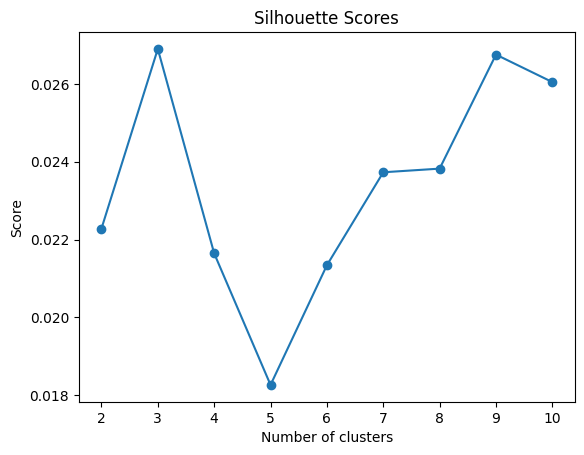

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

k_arr = list(range(2, 11))
silhouette_scores = []

for k in k_arr:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

plt.plot(k_arr, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.show()

In [43]:
k_optimal = k_arr[np.argmax(silhouette_scores)]

In [59]:
k_optimal

3

In [67]:
df = df.drop(["cluster"], axis=1)

In [68]:
model_kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = model_kmeans.fit_predict(df)

/var/folders/65/_pqxxk_n1sl_p8w5kyxhrm640000gp/T/ipykernel_7714/83812065.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = model_kmeans.fit_predict(df)


In [69]:
df

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,cluster
0,0.718821,-0.285592,-0.907467,-0.785730,0.685906,-0.207482,4.669200,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,2.269383,-0.403851,-0.419608,2.488771,-0.406424,-0.410696,-0.400410,1
1,-1.648418,0.178829,-0.907467,-1.616345,0.685906,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,-0.440535,-0.403851,-0.419608,2.488771,-0.406424,-0.410696,-0.400410,1
2,0.390038,0.558810,-0.907467,-0.162769,0.685906,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,-0.440535,-0.403851,-0.419608,-0.401702,-0.406424,-0.410696,2.496802,1
3,-1.516905,1.276552,-0.348982,1.636897,0.685906,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,2.181625,-0.440535,-0.403851,-0.419608,-0.401702,-0.406424,-0.410696,2.496802,1
4,0.061255,-0.454472,-1.465953,0.390975,0.685906,-0.207482,4.669200,-0.195777,-0.207482,-0.21082,...,-0.441365,2.181625,-0.440535,-0.403851,-0.419608,-0.401702,-0.406424,-0.410696,-0.400410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-0.267528,-1.341095,0.628368,0.460193,-1.457551,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,2.269383,-0.403851,-0.419608,-0.401702,-0.406424,-0.410696,2.496802,1
3896,0.521551,-0.454472,1.047232,1.083154,-1.457551,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,-0.440535,2.475526,-0.419608,-0.401702,-0.406424,-0.410696,-0.400410,1
3897,0.127011,-1.129994,-1.186710,-0.093551,-1.457551,4.818469,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,2.269383,-0.403851,-0.419608,-0.401702,-0.406424,2.434267,-0.400410,1
3898,-0.004502,0.727691,0.069882,-0.093551,-1.457551,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,2.269383,-0.403851,-0.419608,-0.401702,-0.406424,-0.410696,2.496802,1


In [70]:
df.nunique()

Age                                   53
Purchase Amount (USD)                 81
Review Rating                         26
Previous Purchases                    50
Gender_Male                            2
                                      ..
Frequency of Purchases_Fortnightly     2
Frequency of Purchases_Monthly         2
Frequency of Purchases_Quarterly       2
Frequency of Purchases_Weekly          2
cluster                                3
Length: 131, dtype: int64

In [71]:
df.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,cluster
0,0.718821,-0.285592,-0.907467,-0.785730,0.685906,-0.207482,4.669200,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,2.269383,-0.403851,-0.419608,2.488771,-0.406424,-0.410696,-0.400410,1
1,-1.648418,0.178829,-0.907467,-1.616345,0.685906,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,-0.440535,-0.403851,-0.419608,2.488771,-0.406424,-0.410696,-0.400410,1
2,0.390038,0.558810,-0.907467,-0.162769,0.685906,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,-0.458256,-0.440535,-0.403851,-0.419608,-0.401702,-0.406424,-0.410696,2.496802,1
3,-1.516905,1.276552,-0.348982,1.636897,0.685906,-0.207482,-0.214115,-0.195777,-0.207482,-0.21082,...,-0.441365,2.181625,-0.440535,-0.403851,-0.419608,-0.401702,-0.406424,-0.410696,2.496802,1
4,0.061255,-0.454472,-1.465953,0.390975,0.685906,-0.207482,4.669200,-0.195777,-0.207482,-0.21082,...,-0.441365,2.181625,-0.440535,-0.403851,-0.419608,-0.401702,-0.406424,-0.410696,-0.400410,1


<h2>Visualization with PCA</h2>

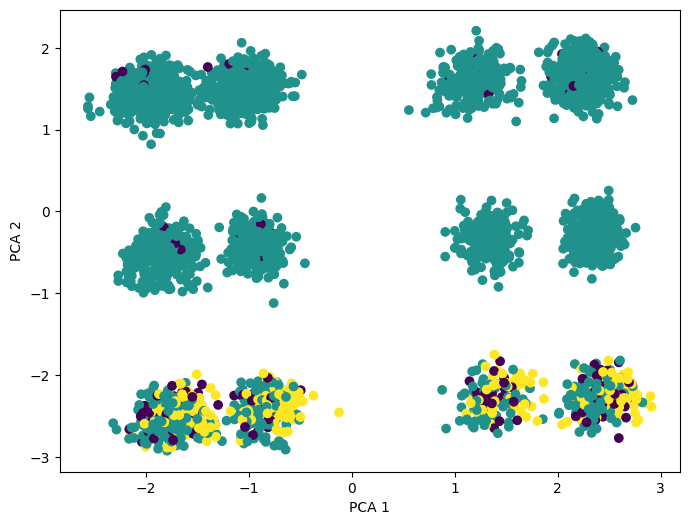

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)

plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1],
            c=df['cluster'])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()